In [1]:
import numpy as np
import pandas as pd

file = './spam.csv'

In [2]:
df = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

###### UnicodeDecodeError Resolving

In [3]:
# If you get a unicode decode error then next you need to try to determine what the character encoding is

import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
df  = pd.read_csv(file, encoding = 'Windows-1252')
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
433,ham,Booked ticket for pongal?,NaN,NaN,NaN
3805,spam,URGENT! We are trying to contact you. Last wee...,NaN,NaN,NaN
514,spam,"You are guaranteed the latest Nokia Phone, a 4...",NaN,NaN,NaN
1684,ham,Do you want bold 2 or bb torch,NaN,NaN,NaN
2803,ham,Lil fever:) now fine:),NaN,NaN,NaN
1967,ham,Even i cant close my eyes you are in me our va...,NaN,NaN,NaN
3644,spam,wamma get laid?want real doggin locations sent...,NaN,NaN,NaN
2394,ham,I don't run away frm u... I walk slowly &amp; ...,NaN,NaN,NaN
3767,ham,Where are you call me.,NaN,NaN,NaN
4334,ham,"Now u sound like manky scouse boy steve,like! ...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

#### Modelling steps:
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Making Website
8. Deployement model using Herokuapp

## Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# because of columns: Unnamed: 2, Unnamed: 3, Unnamed: 4 contain more than 60% of Null values we are going to drop it

df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [8]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
# renaming the columns
df.rename(columns={'v1': 'Target', 'v2': 'SMS'}, inplace = True)
df.sample(3)

,Target,SMS
4677,ham,It is a good thing I'm now getting the connect...
5345,ham,Wat Ì_ doing now?
1066,ham,Once free call me sir. I am waiting for you.


#### Model can predit in terms of Binary, so we replace our object type of Target from int type using - LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df["Target"])

In [13]:
df.head(5)

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Spam : 1
#### ham : 0

In [14]:
# checking the duplicate values
print("There are",df.duplicated().sum(),"duplicate values.")

There are 403 duplicate values.


In [15]:
#remove duplicates
df = df.drop_duplicates(keep="first")

In [16]:
# again checking the duplicate values
print("There are",df.duplicated().sum(),"duplicate values.")

There are 0 duplicate values.


In [17]:
df.head(5)

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [19]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

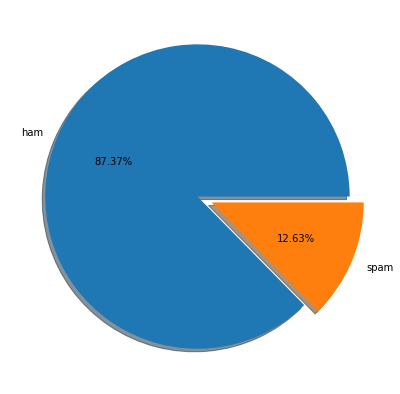

In [21]:
#pie char
plt.figure(figsize=(7,7))

explode = (0,0.1)
plt.pie(df['Target'].value_counts(),explode = explode, labels=["ham","spam"], autopct="%0.2f%%", shadow=True)
plt.show()

As analysing the pie chart, we can clearly say that the data is imbalance 

In [22]:
import nltk
 
# download nltk packages
# for tokenization
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# finding the number of characters in each sentence and add it as a new column
df["numOfCharacter"] = df["SMS"].apply(len)

In [24]:
df.head(5)

,Target,SMS,numOfCharacter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#next step is to find the number of words in each sentences and add it as a new column
df["numOfWords"] = df["SMS"].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head(3)

,Target,SMS,numOfCharacter,numOfWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [27]:
#next step is to find the number of sentences in each record and add it as a new column
df["numOfSentences"] = df["SMS"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head(1)

,Target,SMS,numOfCharacter,numOfWords,numOfSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [29]:
df[["numOfCharacter","numOfWords","numOfSentences"]].describe()

,numOfCharacter,numOfWords,numOfSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# describe of ham messeges
df[df['Target'] == 0][["numOfCharacter","numOfWords","numOfSentences"]].describe()

,numOfCharacter,numOfWords,numOfSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# describe of spam messeges
df[df['Target'] == 1][["numOfCharacter","numOfWords","numOfSentences"]].describe()

,numOfCharacter,numOfWords,numOfSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


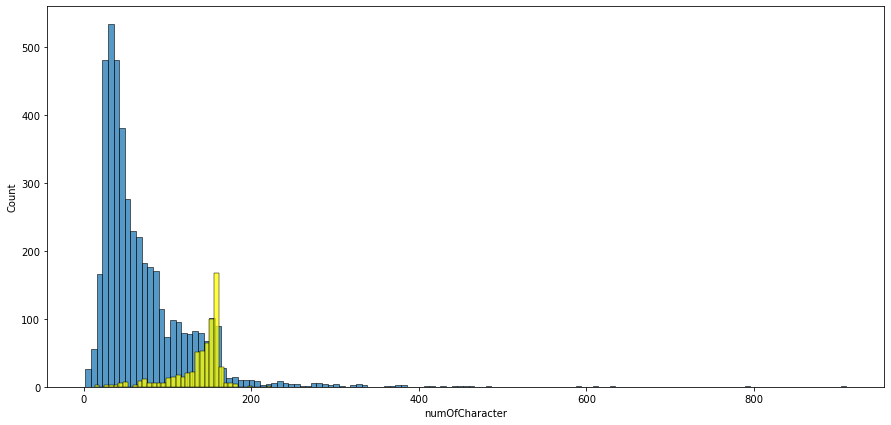

In [32]:
#histogram for spam/ham in number of characters
plt.figure(figsize=(15,7))
sns.histplot(df[df["Target"] == 0]['numOfCharacter'])
sns.histplot(df[df["Target"] == 1]['numOfCharacter'], color = "yellow")
plt.show()

<Figure size 720x432 with 0 Axes>

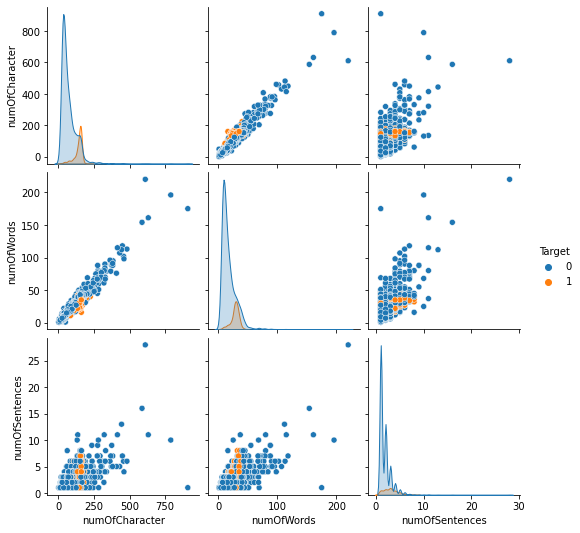

In [33]:
plt.figure(figsize = (10,6))
sns.pairplot(df, hue="Target")
plt.show()

In [34]:
df.corr()

,Target,numOfCharacter,numOfWords,numOfSentences
Target,1.000000,0.384717,0.262984,0.284901
numOfCharacter,0.384717,1.000000,0.965770,0.638143
numOfWords,0.262984,0.965770,1.000000,0.684541
numOfSentences,0.284901,0.638143,0.684541,1.000000


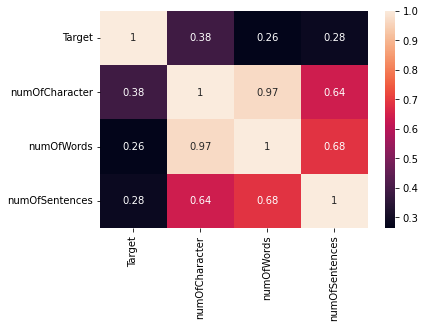

In [35]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data preprocessing
- Lower case
- Tokenization
- Remove special characters
- Remove stop words and punctuation
- Stemming


**Stop words** are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [36]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
import string

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def translating(text):
    text = text.lower() #step1
    text = nltk.word_tokenize(text) #step2
    
    newText = []
    for i in text:
        if  i.isalnum(): #step3
            newText.append(i)
            
    text = newText[:]
    newText.clear()
    
    for i in text: #step4
        if i not in stopwords.words("english") and i not in string.punctuation:
            newText.append(i)
            
    
    #step5
    text = newText[:]
    newText.clear()
    
    for i in text:
        newText.append(ps.stem(i))
            
    return " ".join(newText)

In [40]:
translating("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [41]:
df["SMS"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
#adding new column of preprocessed SMS

df["Preprocessed_Text"] = df["SMS"].apply(translating)

In [43]:
df.head(5)

,Target,SMS,numOfCharacter,numOfWords,numOfSentences,Preprocessed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Creating a word cloud of SMS to check which word is most used in ham/spam

In [45]:
from wordcloud import WordCloud


In [47]:
ws = WordCloud(width=700, height = 700, min_font_size=10, background_color="white")

In [59]:
spam_wc = ws.generate(df[df["Target"] == 1]["Preprocessed_Text"].str.cat(sep = " "))

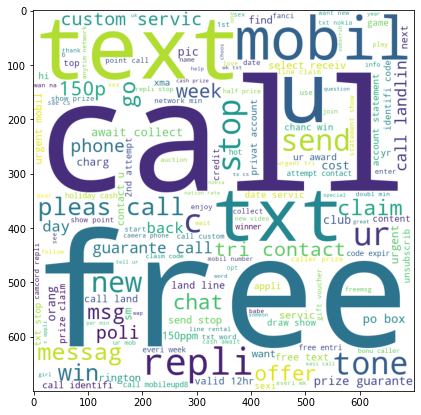

In [60]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [61]:
ham_wc = ws.generate(df[df["Target"] == 0]["Preprocessed_Text"].str.cat(sep = " "))

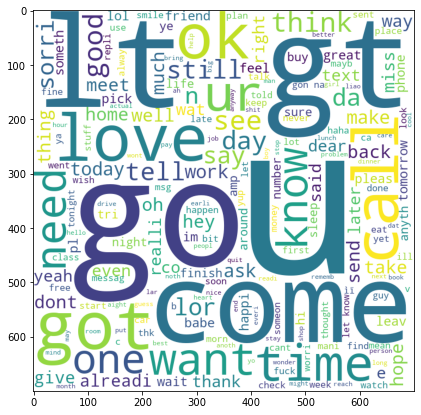

In [62]:
plt.figure(figsize=(15,7))
plt.imshow(ham_wc)

###### Checking the top 30 words used in spam/ham

In [63]:
from collections import Counter

spam

In [73]:
spamWord = []
for sen in df[df["Target"] == 1]["Preprocessed_Text"].tolist():
    for word in sen.split(" "):
        spamWord.append(word)


In [78]:
pd.DataFrame(Counter(spamWord).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\diwak\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


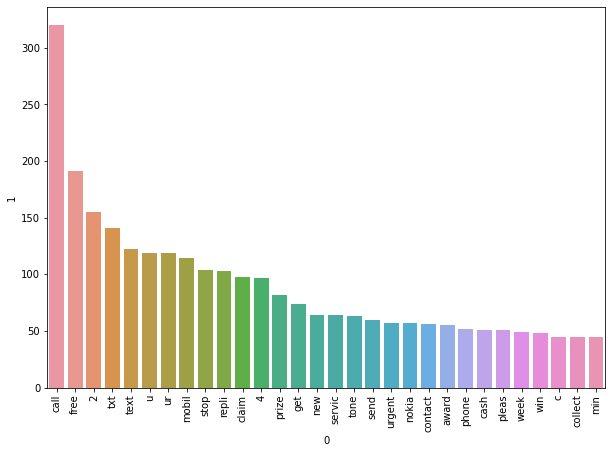

In [87]:
plt.figure(figsize=(10,7))
sns.barplot(pd.DataFrame(Counter(spamWord).most_common(30))[0], pd.DataFrame(Counter(spamWord).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

ham

In [83]:
hamWord = []

for sen in df[df["Target"] == 0]["Preprocessed_Text"].tolist():
    for word in sen.split(" "):
        hamWord.append(word)
        
pd.DataFrame(Counter(hamWord).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\diwak\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


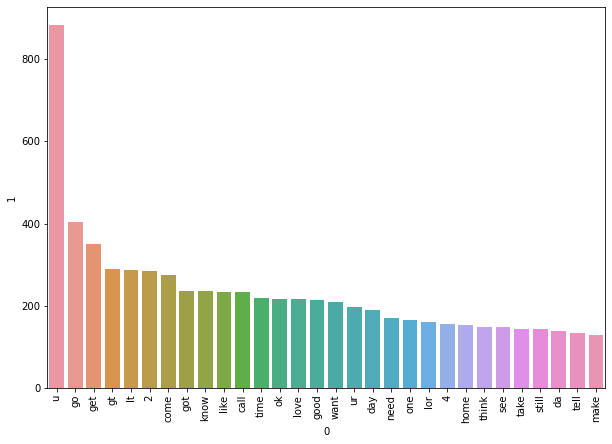

In [86]:
plt.figure(figsize=(10,7))
sns.barplot(pd.DataFrame(Counter(hamWord).most_common(30))[0], pd.DataFrame(Counter(hamWord).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

# Model Building/Evaluation

first we have to do Text vectorization because our **Preprocessed_Text** feature is in object type and to create a model we need non_string data

In [239]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [240]:
x = tfidf.fit_transform(df["Preprocessed_Text"]).toarray()

In [241]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [242]:
x.shape

(5169, 3000)

In [243]:
y = df["Target"].values

In [244]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train,x_test,Y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [247]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [248]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [249]:
# GaussianNB
gnb.fit(X_train,Y_train)

y_pred1 = gnb.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred1))
print()
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred1))
print()
print("Precision Score:", precision_score(y_test,y_pred1))



Accuracy score: 0.8723404255319149

Confusion matrix:
 [[782 114]
 [ 18 120]]

Precision Score: 0.5128205128205128


In [250]:
# MultinomialNB
mnb.fit(X_train,Y_train)

y_pred2 = mnb.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred2))
print()
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred2))
print()
print("Precision Score:", precision_score(y_test,y_pred2))



Accuracy score: 0.9787234042553191

Confusion matrix:
 [[889   7]
 [ 15 123]]

Precision Score: 0.9461538461538461


In [251]:
# BernoulliNB
bnb.fit(X_train,Y_train)

y_pred3 = bnb.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred3))
print()
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred3))
print()
print("Precision Score:", precision_score(y_test,y_pred3))



Accuracy score: 0.9835589941972921

Confusion matrix:
 [[895   1]
 [ 16 122]]

Precision Score: 0.991869918699187


In [252]:
# tfidf with MultinomialNB

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [254]:
svc = SVC(kernel="sigmoid", gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty = "l1")
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators= 50, random_state=2)

In [255]:
clfs = {
    'SVC':svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gdbc,
    'xgb': xgb
}

In [256]:
def train_classifier(clf, X_train,Y_train,x_test,y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [215]:
train_classifier(svc,X_train,Y_train,x_test,y_test)

(0.9700193423597679, 0.9349593495934959)

In [216]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,x_test,y_test)
    
    print("Classifier Name:",name)
    
    print("Accuracy:", current_accuracy)
    print("Precision:",current_precision)
    print()
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Classifier Name: SVC
Accuracy: 0.9700193423597679
Precision: 0.9349593495934959

Classifier Name: KN
Accuracy: 0.8965183752417795
Precision: 1.0

Classifier Name: NB
Accuracy: 0.9690522243713733
Precision: 0.863013698630137

Classifier Name: DT
Accuracy: 0.9352030947775629
Precision: 0.8380952380952381

Classifier Name: LR
Accuracy: 0.965183752417795
Precision: 0.9473684210526315

Classifier Name: RF
Accuracy: 0.9738878143133463
Precision: 1.0

Classifier Name: AdaBoost
Accuracy: 0.9613152804642167
Precision: 0.9454545454545454

Classifier Name: BgC
Accuracy: 0.9584139264990329
Precision: 0.8625954198473282

Classifier Name: ETC
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829

Classifier Name: GBDT
Accuracy: 0.9526112185686654
Precision: 0.9238095238095239

Classifier Name: xgb
Accuracy: 0.9690522243713733
Precision: 0.9344262295081968



##### max_features 3000

In [236]:
accuracy_scores2 = []
precision_scores2 = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,x_test,y_test)
    
    print("Classifier Name:",name)
    
    print("Accuracy:", current_accuracy)
    print("Precision:",current_precision)
    print()
    accuracy_scores2.append(current_accuracy)
    precision_scores2.append(current_precision)

Classifier Name: SVC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865

Classifier Name: KN
Accuracy: 0.9052224371373307
Precision: 1.0

Classifier Name: NB
Accuracy: 0.9709864603481625
Precision: 1.0

Classifier Name: DT
Accuracy: 0.9274661508704062
Precision: 0.8118811881188119

Classifier Name: LR
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703

Classifier Name: RF
Accuracy: 0.9748549323017408
Precision: 0.9827586206896551

Classifier Name: AdaBoost
Accuracy: 0.960348162475822
Precision: 0.9292035398230089

Classifier Name: BgC
Accuracy: 0.9574468085106383
Precision: 0.8671875

Classifier Name: ETC
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406

Classifier Name: GBDT
Accuracy: 0.9477756286266924
Precision: 0.92

Classifier Name: xgb
Accuracy: 0.971953578336557
Precision: 0.943089430894309



##### Scaling

In [257]:
# accuracy_scores3 = []
# precision_scores3 = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,x_test,y_test)
    
#     print("Classifier Name:",name)
    
#     print("Accuracy:", current_accuracy)
#     print("Precision:",current_precision)
#     print()
#     accuracy_scores3.append(current_accuracy)
#     precision_scores3.append(current_precision)

Classifier Name: SVC
Accuracy: 0.9661508704061895
Precision: 0.9256198347107438

Classifier Name: KN
Accuracy: 0.9052224371373307
Precision: 0.9761904761904762

Classifier Name: NB
Accuracy: 0.9787234042553191
Precision: 0.9461538461538461

Classifier Name: DT
Accuracy: 0.9274661508704062
Precision: 0.8118811881188119

Classifier Name: LR
Accuracy: 0.9671179883945842
Precision: 0.9642857142857143

Classifier Name: RF
Accuracy: 0.9748549323017408
Precision: 0.9827586206896551

Classifier Name: AdaBoost
Accuracy: 0.960348162475822
Precision: 0.9292035398230089

Classifier Name: BgC
Accuracy: 0.9574468085106383
Precision: 0.8671875

Classifier Name: ETC
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406

Classifier Name: GBDT
Accuracy: 0.9477756286266924
Precision: 0.92

Classifier Name: xgb
Accuracy: 0.971953578336557
Precision: 0.943089430894309



In [258]:
# performance_df["Accuracy_scaling"] = accuracy_scores3
# performance_df["Precision_scaling"] = precision_scores3

In [217]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores})

In [237]:
performance_df["Accuracy_maxft3000"] = accuracy_scores2
performance_df["Precision_maxft3000"] = precision_scores2

In [259]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_maxft3000,Precision_maxft3000,Accuracy_scaling,Precision_scaling
0,SVC,0.970019,0.934959,0.975822,0.974790,0.966151,0.925620
1,KN,0.896518,1.000000,0.905222,1.000000,0.905222,0.976190
2,NB,0.969052,0.863014,0.970986,1.000000,0.978723,0.946154
3,DT,0.935203,0.838095,0.927466,0.811881,0.927466,0.811881
4,LR,0.965184,0.947368,0.958414,0.970297,0.967118,0.964286
5,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188
8,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000


# Model Improvement

In [ ]:
#1. Changes in tfidf -> add max_features = 3000 because there are around
#6000 unique words
# and we only taking 3000 to increase our accuracy

In [ ]:
#2. Scaling the X to check whether the accuracy increasing or not

In [260]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))